In [ ]:
import keras
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


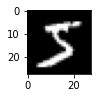

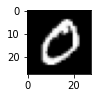

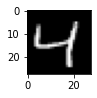

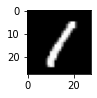

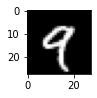

In [ ]:
from matplotlib import pyplot as plt
for i in range(5):  
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

In [ ]:
def idBlock(x, filter):
    # copy the input to feed it forward
    res = x
    # First Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Second Layer 
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Feed the res
    x = tf.keras.layers.Add()([x, res])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def convBlock(x, filter):
    # copy the input to feed it forward
    res = x
    # sending the res through conv(1,1) before feeding it
    res = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(res)
    # First Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Second Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Feed the processed res
    x = tf.keras.layers.Add()([x, res])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def ResNet18(shape = (28, 28, 1), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [2, 2, 2, 2]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = idBlock(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convBlock(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = idBlock(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet18")
    return model

In [ ]:
model = ResNet18()

In [ ]:
hist=[]
results=[]

In [ ]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01, momentum=0.9),Adam(lr=0.001)]
epochs_list = [5,10,20]
for optimizer in  opt_list:
  for epoch in epochs_list:

    model.compile(optimizer = optimizer, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = model.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
      validation_split = 0.2
    )
    hist.append(history.history)
    results.append(model.evaluate(test_X, test_y, batch_size=128))

Epoch 1/5
750/750 [==============================] - 38s 47ms/step - loss: 0.1623 - accuracy: 0.9530 - val_loss: 0.0942 - val_accuracy: 0.9714
Epoch 2/5
750/750 [==============================] - 35s 46ms/step - loss: 0.0536 - accuracy: 0.9843 - val_loss: 0.0875 - val_accuracy: 0.9734
Epoch 3/5
750/750 [==============================] - 35s 46ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.0543 - val_accuracy: 0.9868
Epoch 4/5
750/750 [==============================] - 35s 46ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.0392 - val_accuracy: 0.9890
Epoch 5/5
79/79 [==============================] - 2s 20ms/step - loss: 0.0355 - accuracy: 0.9895
Epoch 1/10
750/750 [==============================] - 39s 47ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.0519 - val_accuracy: 0.9854
Epoch 2/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.0332 - val_accuracy: 0.9906
Epoch 3/10
750/750 [======================

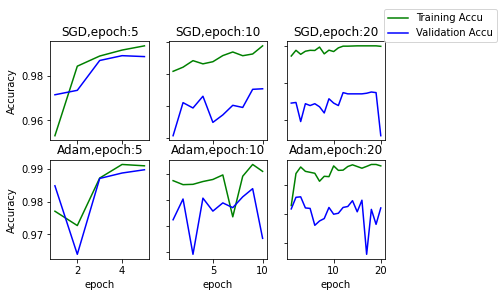

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
print("Accuracy", hist[0]['accuracy'])
print("Validation Accuracy", hist[0]['val_accuracy'])

print("Accuracy", hist[1]['accuracy'])
print("Validation Accuracy", hist[1]['val_accuracy'])


print("Accuracy", hist[2]['accuracy'])
print("Validation Accuracy", hist[2]['val_accuracy'])


print("Accuracy", hist[3]['accuracy'])
print("Validation Accuracy", hist[3]['val_accuracy'])

print("Accuracy", hist[4]['accuracy'])
print("Validation Accuracy", hist[4]['val_accuracy'])

print("Accuracy", hist[5]['accuracy'])
print("Validation Accuracy", hist[5]['val_accuracy'])


Accuracy [0.953000009059906, 0.9842708110809326, 0.9888333082199097, 0.9915208220481873, 0.9934166669845581]
Validation Accuracy [0.9714166522026062, 0.9734166860580444, 0.9868333339691162, 0.9890000224113464, 0.9885833263397217]
Accuracy [0.995479166507721, 0.9961249828338623, 0.9971458315849304, 0.9966458082199097, 0.9969791769981384, 0.9979375004768372, 0.9984999895095825, 0.9979166388511658, 0.9981874823570251, 0.9994583129882812]
Validation Accuracy [0.9854166507720947, 0.9905833601951599, 0.9897500276565552, 0.9915833473205566, 0.987500011920929, 0.9886666536331177, 0.9901666641235352, 0.9898333549499512, 0.9926666617393494, 0.9927499890327454]
Accuracy [0.9986249804496765, 0.9993958473205566, 0.9988541603088379, 0.9992708563804626, 0.9993958473205566, 0.9993749856948853, 0.999833345413208, 0.9989166855812073, 0.9994166493415833, 0.9992291927337646, 0.9997291564941406, 0.999958336353302, 0.999958336353302, 0.9999791383743286, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999374747276306]
Validatio

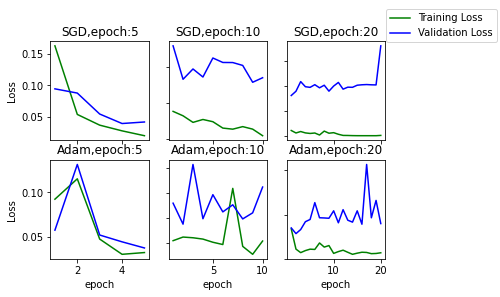

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
print("Loss", hist[0]['loss'])
print("Validation Loss", hist[0]['val_loss'])

print("Loss", hist[1]['loss'])
print("Validation Loss", hist[1]['val_loss'])

print("Loss", hist[2]['loss'])
print("Validation Loss", hist[2]['val_loss'])

print("Loss", hist[3]['loss'])
print("Validation Loss", hist[3]['val_loss'])

print("Loss", hist[4]['loss'])
print("Validation Loss", hist[4]['val_loss'])

print("Loss", hist[5]['loss'])
print("Validation Loss", hist[5]['val_loss'])

Loss [0.16229572892189026, 0.053638190031051636, 0.03667035326361656, 0.027620773762464523, 0.019935818389058113]
Validation Loss [0.09417856484651566, 0.08748072385787964, 0.05429225042462349, 0.03923800587654114, 0.041656121611595154]
Loss [0.015324185602366924, 0.0128683065995574, 0.00919810775667429, 0.01081202831119299, 0.009569579735398293, 0.0060162730515003204, 0.0054135615937411785, 0.006830411497503519, 0.0054323552176356316, 0.0017693144036456943]
Validation Loss [0.05185169354081154, 0.03321965038776398, 0.03896374627947807, 0.03448734059929848, 0.04508145526051521, 0.04259199649095535, 0.04254421591758728, 0.04094066470861435, 0.031553179025650024, 0.034077808260917664]
Loss [0.004213501233607531, 0.0022144520189613104, 0.003375039668753743, 0.0022660361137241125, 0.0018325684359297156, 0.0021789916791021824, 0.0005768657429143786, 0.0037184585817158222, 0.0020174721721559763, 0.0024552217219024897, 0.0011694177519530058, 0.0002450576866976917, 0.00019959398196078837, 8.39

In [ ]:
def ResNet34(shape = (28, 28, 1), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = idBlock(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convBlock(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = idBlock(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
model = ResNet34()

In [ ]:
hist=[]
results=[]

In [ ]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01, momentum=0.9),Adam(lr=0.001)]
epochs_list = [5,10,20]
for optimizer in  opt_list:
  for epoch in epochs_list:

    model.compile(optimizer = optimizer, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = model.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
      validation_split = 0.2
    )
    hist.append(history.history)
    results.append(model.evaluate(test_X, test_y, batch_size=128))

Epoch 1/5
750/750 [==============================] - 37s 46ms/step - loss: 0.1676 - accuracy: 0.9511 - val_loss: 0.0858 - val_accuracy: 0.9768
Epoch 2/5
750/750 [==============================] - 34s 46ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0579 - val_accuracy: 0.9840
Epoch 3/5
750/750 [==============================] - 34s 46ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0521 - val_accuracy: 0.9848
Epoch 4/5
750/750 [==============================] - 35s 46ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0781 - val_accuracy: 0.9807
Epoch 5/5
79/79 [==============================] - 2s 21ms/step - loss: 0.0387 - accuracy: 0.9879
Epoch 1/10
750/750 [==============================] - 38s 47ms/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.0454 - val_accuracy: 0.9884
Epoch 2/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.0490 - val_accuracy: 0.9869
Epoch 3/10
750/750 [======================

In [ ]:
print("Accuracy", hist[0]['accuracy'])
print("Validation Accuracy", hist[0]['val_accuracy'])

print("Accuracy", hist[1]['accuracy'])
print("Validation Accuracy", hist[1]['val_accuracy'])


print("Accuracy", hist[2]['accuracy'])
print("Validation Accuracy", hist[2]['val_accuracy'])


print("Accuracy", hist[3]['accuracy'])
print("Validation Accuracy", hist[3]['val_accuracy'])

print("Accuracy", hist[4]['accuracy'])
print("Validation Accuracy", hist[4]['val_accuracy'])

print("Accuracy", hist[5]['accuracy'])
print("Validation Accuracy", hist[5]['val_accuracy'])

Accuracy [0.9511458277702332, 0.9842291474342346, 0.9885833263397217, 0.9916250109672546, 0.9931041598320007]
Validation Accuracy [0.9767500162124634, 0.984000027179718, 0.9848333597183228, 0.9806666374206543, 0.9865833520889282]
Accuracy [0.9947083592414856, 0.9957291483879089, 0.9957500100135803, 0.9965833425521851, 0.9981666803359985, 0.9982708096504211, 0.9980000257492065, 0.9975208044052124, 0.9984375238418579, 0.9991666674613953]
Validation Accuracy [0.9884166717529297, 0.9869166612625122, 0.9924166798591614, 0.9857500195503235, 0.9926666617393494, 0.9896666407585144, 0.9892500042915344, 0.9912499785423279, 0.9913333058357239, 0.9921666383743286]
Accuracy [0.99979168176651, 0.999916672706604, 0.9987083077430725, 0.9992499947547913, 0.9984166622161865, 0.9994375109672546, 0.9995208382606506, 0.999708354473114, 0.9991875290870667, 0.9988958239555359, 0.9992916584014893, 0.99979168176651, 0.999833345413208, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracy [0.9925833344459534, 

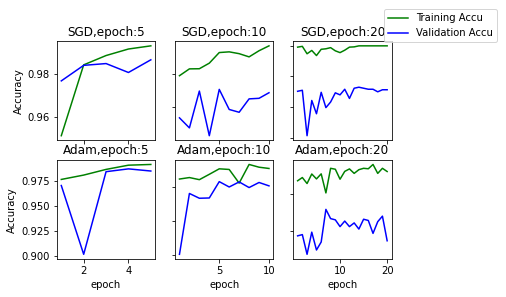

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")


axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")


axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")


axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
print("Loss", hist[0]['loss'])
print("Validation Loss", hist[0]['val_loss'])

print("Loss", hist[1]['loss'])
print("Validation Loss", hist[1]['val_loss'])

print("Loss", hist[2]['loss'])
print("Validation Loss", hist[2]['val_loss'])

print("Loss", hist[3]['loss'])
print("Validation Loss", hist[3]['val_loss'])

print("Loss", hist[4]['loss'])
print("Validation Loss", hist[4]['val_loss'])

print("Loss", hist[5]['loss'])
print("Validation Loss", hist[5]['val_loss'])

Loss [0.16756919026374817, 0.050920628011226654, 0.037750594317913055, 0.027151798829436302, 0.022760571911931038]
Validation Loss [0.0857943519949913, 0.05790378153324127, 0.05214037001132965, 0.07806921750307083, 0.047127921134233475]
Loss [0.017655683681368828, 0.014157396741211414, 0.013179261237382889, 0.011069495230913162, 0.006178766954690218, 0.005362820811569691, 0.00627540610730648, 0.0076552205719053745, 0.00502817053347826, 0.0030357022769749165]
Validation Loss [0.04543464630842209, 0.048982713371515274, 0.028758583590388298, 0.05607844516634941, 0.03132742643356323, 0.04361322522163391, 0.04748663306236267, 0.03745375573635101, 0.035004667937755585, 0.03615366294980049]
Loss [0.0008060936816036701, 0.0006016491679474711, 0.00448589725419879, 0.002376637887209654, 0.005343545228242874, 0.0018993765115737915, 0.0014663985930383205, 0.000973041052930057, 0.0027271525468677282, 0.004208986181765795, 0.0028562999796122313, 0.0007141291862353683, 0.0005274271825328469, 6.505218

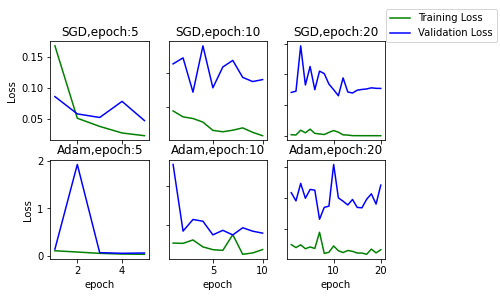

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Previous RUN

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
##Epoch -1
model_1 = ResNet18()
model_1.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
model_1.summary()
train = model_1.fit(train_X,train_y, validation_split = 0.2, batch_size=64, epochs=1)


Model: "ResNet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 34, 34, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 17, 17, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 17, 17, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                

In [ ]:
train.history

{'loss': [0.15857672691345215],
 'accuracy': [0.9538124799728394],
 'val_loss': [0.11048071086406708],
 'val_accuracy': [0.9664999842643738]}

In [ ]:
## Model Evaluation
score = model_1.evaluate(test_X, test_y, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.11403250694274902
Test Accuracy: 0.9629999995231628


In [ ]:
##Epoch -2
model_2 = ResNet18()
model_2.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
model_2.summary()
train_2 = model_2.fit(train_X,train_y,validation_split = 0.2 ,batch_size=64, epochs=2)

Model: "ResNet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 34, 34, 1)   0           ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 17, 17, 64)   3200        ['zero_padding2d_1[0][0]']       
                                                                                                  
 batch_normalization_17 (BatchN  (None, 17, 17, 64)  256         ['conv2d_20[0][0]']       

In [ ]:
hist = train_2.history
hist

{'loss': [0.3364197015762329, 0.07104864716529846],
 'accuracy': [0.8873958587646484, 0.9791458249092102],
 'val_loss': [0.07198639214038849, 0.05333320051431656],
 'val_accuracy': [0.9796666502952576, 0.98416668176651]}

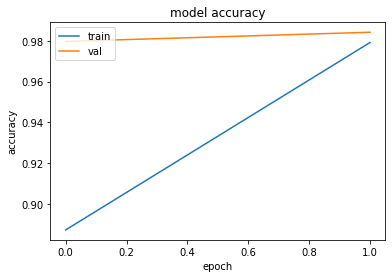

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
 

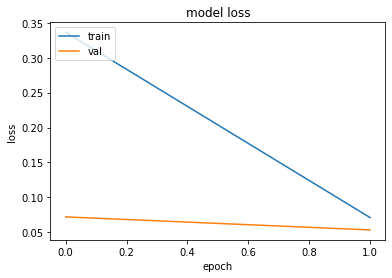

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## Model Evaluation
score = model_2.evaluate(test_X, test_y, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.047300200909376144
Test Accuracy: 0.986299991607666


In [ ]:
##Epoch -5
model_3 = ResNet18()
model_3.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
model_3.summary()
train_3 = model_3.fit(train_X,train_y,validation_split = 0.2,batch_size=64, epochs=5)

Model: "ResNet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 34, 34, 1)   0           ['input_7[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_152 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_6[0][0]']       
                                                                                                  
 batch_normalization_134 (Batch  (None, 17, 17, 64)  256         ['conv2d_152[0][0]']      

In [ ]:
hist_3 = train_3.history
hist_3

{'loss': [0.5181480050086975,
  0.07542986422777176,
  0.051043737679719925,
  0.0430375300347805,
  0.03570472449064255],
 'accuracy': [0.8253958225250244,
  0.976520836353302,
  0.9851041436195374,
  0.9871875047683716,
  0.989229142665863],
 'val_loss': [0.13129198551177979,
  0.07353343814611435,
  0.06681394577026367,
  0.04614797607064247,
  0.04562488943338394],
 'val_accuracy': [0.9615833163261414,
  0.9784166812896729,
  0.9801666736602783,
  0.9860833287239075,
  0.9869999885559082]}

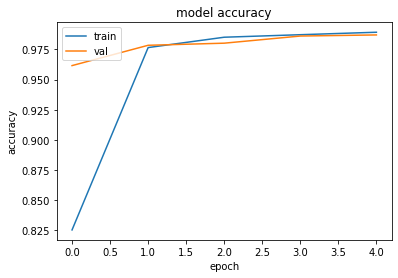

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist_3['accuracy'])
plt.plot(hist_3['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

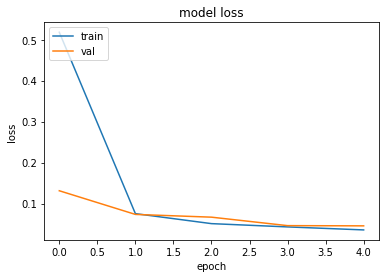

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist_3['loss'])
plt.plot(hist_3['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##RESNET-34


In [ ]:
def ResNet34(shape = (28, 28, 1), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = idBlock(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convBlock(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = idBlock(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
##Epoch -1
model_1 = ResNet34()
model_1.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
model_1.summary()
train = model_1.fit(train_X,train_y,validation_split = 0.2,batch_size=64, epochs=1)


Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_7 (ZeroPadding2  (None, 34, 34, 1)   0           ['input_8[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_172 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_7[0][0]']       
                                                                                                  
 batch_normalization_151 (Batch  (None, 17, 17, 64)  256         ['conv2d_172[0][0]']      

In [ ]:
hist = train.history
hist

{'loss': [0.7971086502075195],
 'accuracy': [0.7336249947547913],
 'val_loss': [0.11161133646965027],
 'val_accuracy': [0.9666666388511658]}

In [ ]:
##Epoch -2
model_2 = ResNet34()
model_2.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
model_2.summary()
train = model_2.fit(train_X,train_y,validation_split = 0.2,batch_size=64, epochs=2)


Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_8 (ZeroPadding2  (None, 34, 34, 1)   0           ['input_9[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_208 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_8[0][0]']       
                                                                                                  
 batch_normalization_184 (Batch  (None, 17, 17, 64)  256         ['conv2d_208[0][0]']      

In [ ]:
hist = train.history
hist

{'loss': [0.6266476511955261, 0.09043020755052567],
 'accuracy': [0.7979999780654907, 0.9728124737739563],
 'val_loss': [0.11134590953588486, 0.09934612363576889],
 'val_accuracy': [0.9664999842643738, 0.971916675567627]}

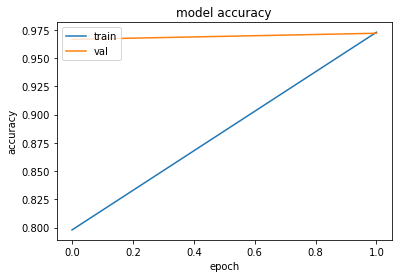

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

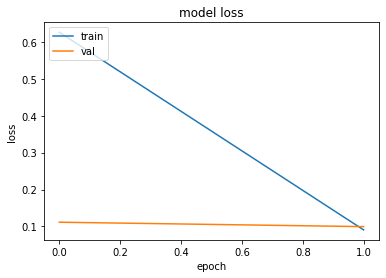

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
##Epoch -5
model_3 = ResNet34()
model_3.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
model_3.summary()
train = model_3.fit(train_X,train_y,validation_split = 0.2,batch_size=64, epochs=5)


Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_9 (ZeroPadding2  (None, 34, 34, 1)   0           ['input_10[0][0]']               
 D)                                                                                               
                                                                                                  
 conv2d_244 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_9[0][0]']       
                                                                                                  
 batch_normalization_217 (Batch  (None, 17, 17, 64)  256         ['conv2d_244[0][0]']      

In [ ]:
hist = train.history
hist

{'loss': [1.0403131246566772,
  0.14645244181156158,
  0.08068042248487473,
  0.058290936052799225,
  0.04912229999899864],
 'accuracy': [0.6606041789054871,
  0.9618750214576721,
  0.9775208234786987,
  0.9839791655540466,
  0.9865208268165588],
 'val_loss': [0.7500503063201904,
  0.11885331571102142,
  0.06473197788000107,
  0.10737696290016174,
  0.15022370219230652],
 'val_accuracy': [0.7478333115577698,
  0.9677500128746033,
  0.9825000166893005,
  0.9698333144187927,
  0.9616666436195374]}

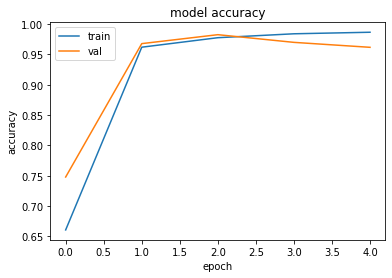

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

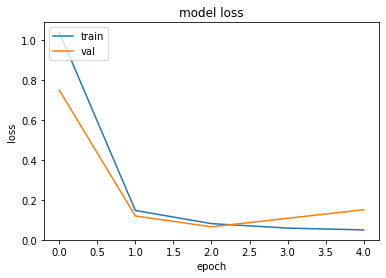

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Using SGD optimizer

In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
##Epoch -1
models_1 = ResNet18()
models_1.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
models_1.summary()
train = models_1.fit(train_X,train_y,validation_split = 0.2,batch_size=64, epochs=1)

Model: "ResNet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 34, 34, 1)   0           ['input_11[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_280 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_10[0][0]']      
                                                                                                  
 batch_normalization_250 (Batch  (None, 17, 17, 64)  256         ['conv2d_280[0][0]']      

In [ ]:
hist = train.history
hist

{'loss': [0.1309771090745926],
 'accuracy': [0.9602916836738586],
 'val_loss': [0.15546022355556488],
 'val_accuracy': [0.9505833387374878]}

In [ ]:
##Epoch -2
models_2 = ResNet18()
models_2.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
models_2.summary()
train = models_2.fit(train_X,train_y,validation_split = 0.2,batch_size=64, epochs=2)

Model: "ResNet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_11 (ZeroPadding  (None, 34, 34, 1)   0           ['input_12[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_300 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_11[0][0]']      
                                                                                                  
 batch_normalization_267 (Batch  (None, 17, 17, 64)  256         ['conv2d_300[0][0]']      

In [ ]:
hist = train.history
hist

{'loss': [0.1308877170085907, 0.046124186366796494],
 'accuracy': [0.9596041440963745, 0.9858124852180481],
 'val_loss': [0.11286293715238571, 0.09584365785121918],
 'val_accuracy': [0.968416690826416, 0.972083330154419]}

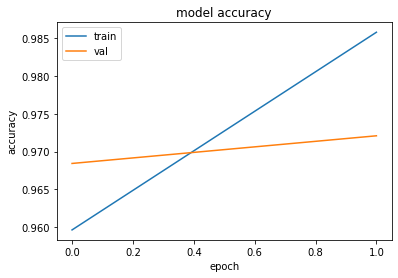

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

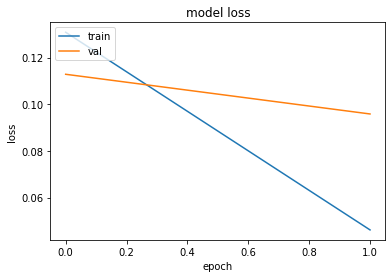

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
##Epoch -5
models_3 = ResNet18()
models_3.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
models_3.summary()
train = models_3.fit(train_X,train_y,validation_split=0.2,batch_size=64, epochs=5)

Model: "ResNet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 34, 34, 1)   0           ['input_13[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_320 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_12[0][0]']      
                                                                                                  
 batch_normalization_284 (Batch  (None, 17, 17, 64)  256         ['conv2d_320[0][0]']      

In [ ]:
hist = train.history
hist

{'loss': [0.13357894122600555,
  0.044375091791152954,
  0.029308943077921867,
  0.02297348342835903,
  0.01688525080680847],
 'accuracy': [0.9595624804496765,
  0.9859166741371155,
  0.9911666512489319,
  0.9927083253860474,
  0.9947083592414856],
 'val_loss': [0.07544542104005814,
  0.052015140652656555,
  0.04393608495593071,
  0.044991426169872284,
  0.03789326176047325],
 'val_accuracy': [0.9776666760444641,
  0.98458331823349,
  0.987416684627533,
  0.9872499704360962,
  0.9893333315849304]}

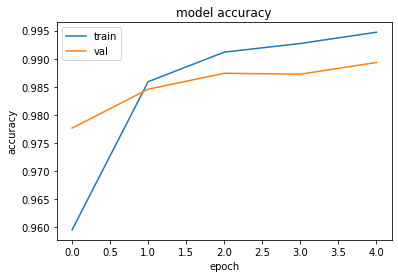

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

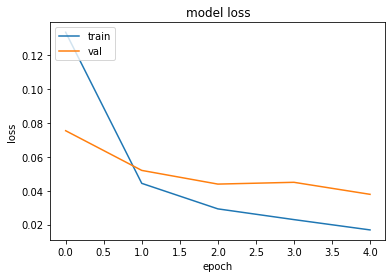

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Using ResNet-34


In [ ]:
##Epoch -1
modelss_1 = ResNet34()
modelss_1.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
modelss_1.summary()
train = modelss_1.fit(train_X,train_y,validation_split=0.2,batch_size=64, epochs=1)

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_13 (ZeroPadding  (None, 34, 34, 1)   0           ['input_14[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_340 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_13[0][0]']      
                                                                                                  
 batch_normalization_301 (Batch  (None, 17, 17, 64)  256         ['conv2d_340[0][0]']      

In [ ]:
hist = train.history
hist

{'loss': [0.15054082870483398],
 'accuracy': [0.953208327293396],
 'val_loss': [0.1475236862897873],
 'val_accuracy': [0.9555833339691162]}

In [ ]:
##Epoch -2
modelss_2 = ResNet34()
modelss_2.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
modelss_2.summary()
train = modelss_2.fit(train_X,train_y,validation_split=0.2,batch_size=64, epochs=2)

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_14 (ZeroPadding  (None, 34, 34, 1)   0           ['input_15[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_376 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_14[0][0]']      
                                                                                                  
 batch_normalization_334 (Batch  (None, 17, 17, 64)  256         ['conv2d_376[0][0]']      

In [ ]:
hist = train.history
hist

{'loss': [0.15407638251781464, 0.05291621387004852],
 'accuracy': [0.9523749947547913, 0.9845208525657654],
 'val_loss': [0.13151557743549347, 0.048762716352939606],
 'val_accuracy': [0.9625833630561829, 0.9854166507720947]}

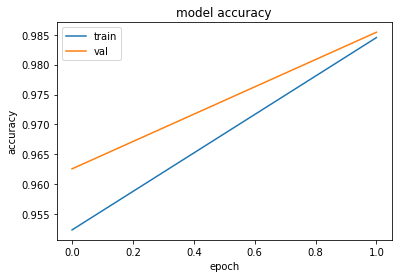

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

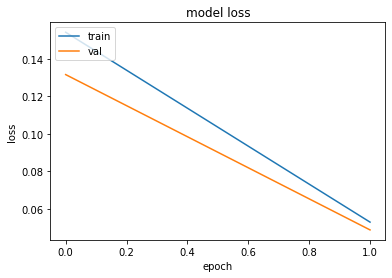

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
##Epoch -3
modelss_3 = ResNet34()
modelss_3.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
modelss_3.summary()
train = modelss_3.fit(train_X,train_y,validation_split=0.2,batch_size=64, epochs=5)

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_15 (ZeroPadding  (None, 34, 34, 1)   0           ['input_16[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_412 (Conv2D)            (None, 17, 17, 64)   3200        ['zero_padding2d_15[0][0]']      
                                                                                                  
 batch_normalization_367 (Batch  (None, 17, 17, 64)  256         ['conv2d_412[0][0]']      

In [ ]:
hist = train.history
hist

{'loss': [0.16240975260734558,
  0.053356416523456573,
  0.035297542810440063,
  0.02494243159890175,
  0.021813761442899704],
 'accuracy': [0.9533958435058594,
  0.984666645526886,
  0.9894166588783264,
  0.9921875,
  0.9933333396911621],
 'val_loss': [0.10191319137811661,
  0.385773628950119,
  0.07094403356313705,
  0.045906249433755875,
  0.04957987368106842],
 'val_accuracy': [0.9703333377838135,
  0.8974999785423279,
  0.9804999828338623,
  0.9870833158493042,
  0.9865833520889282]}

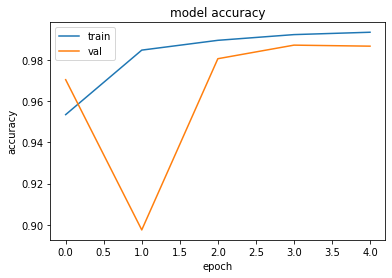

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

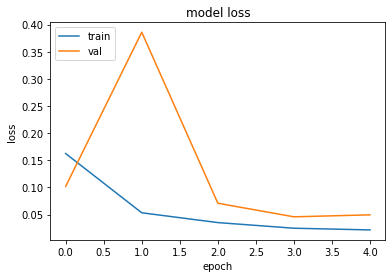

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()